In [3]:
# Data and plotting imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

2.Mastering the Data

In [ ]:
#Set the display to easy to see
pd.set_option('display.max_columns',200)

In [6]:
df_raw= pd.read_csv('D:/2.Python/Project SOS/House Price/train.csv')

In [7]:
#check for dupes for Id (In this case, it do not have duplicate data)
idsUnique = len(set(df_raw.Id))
idsTotal = df_raw.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


df_raw have too many columns, hence it need to be split into multiple tables in order to easier to use.
We split the df_raw into 6 tables 

In [ ]:
df_raw= df_raw.rename(columns={"Id":"ID_Sales"})

In [ ]:
# Create the categories 
outsidesurr_df = df_raw[['ID_Sales', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape']]

building_df = df_raw[['ID_Sales', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']]

utilities_df = df_raw[['ID_Sales', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal']]

ratings_df = df_raw[['ID_Sales', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual']]

rooms_df = df_raw[['ID_Sales', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]


In [ ]:
### Create primary key for each table 
outsidesurr= outsidesurr_df['ID_Sales'].astype(str)+'OSD'
building = building_df['ID_Sales'].astype(str)+'BUILD'
utilities = utilities_df['ID_Sales'].astype(str)+'UTL'
ratings = ratings_df['ID_Sales'].astype(str)+'RAT'
rooms = rooms_df['ID_Sales'].astype(str)+'ROOM'

In [ ]:
### Drop ID_Sales
outsidesurr_df= outsidesurr_df.drop(['ID_Sales'], axis=1)
building_df= building_df.drop(['ID_Sales'], axis=1)
utilities_df=utilities_df.drop(['ID_Sales'], axis=1)
rooms_df=rooms_df.drop(['ID_Sales'], axis=1)

In [ ]:
### Add primary key for each table  
outsidesurr_df.insert(0,'ID_OSD',outsidesurr)
building_df.insert(0,'ID_BUILD',building)
utilities_df.insert(0,'ID_UTL',utilities)
ratings_df.insert(0,'ID_RAT',ratings)
rooms_df.insert(0,'ID_ROOM',rooms)

In [ ]:
### Add foreign key for saleprice_df
saleprice_df= pd.concat([df_raw[['ID_Sales','SalePrice','SaleType','SaleCondition']], outsidesurr_df['ID_OSD'],building_df['ID_BUILD'],
           utilities_df['ID_UTL'],ratings_df['ID_RAT'],rooms_df['ID_ROOM']], axis=1)

After split the tables, we have 6 smaller table, which are easier to use, include: 
    saleprice_df
    outsidesurr_df
    building_df
    utilities_df
    ratings_df
    rooms_df
    
(picture of diagram/ nhớ nhắc t gửi ko t quên =)))

In [ ]:
3. Performing the test

In [ ]:
### Merge table to take data
df=saleprice_df.merge(outsidesurr_df,on='ID_OSD').merge(building_df,on='ID_BUILD')\
    .merge(utilities_df, on='ID_UTL').merge(ratings_df,on='ID_RAT').merge(rooms_df,on='ID_ROOM')

In [ ]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Because the minimum price is higher than zero (which is obviously true in reality), therefore, it is suitable for the project 

C:\Users\admin\AppData\Local\Temp\ipykernel_10296\374509140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


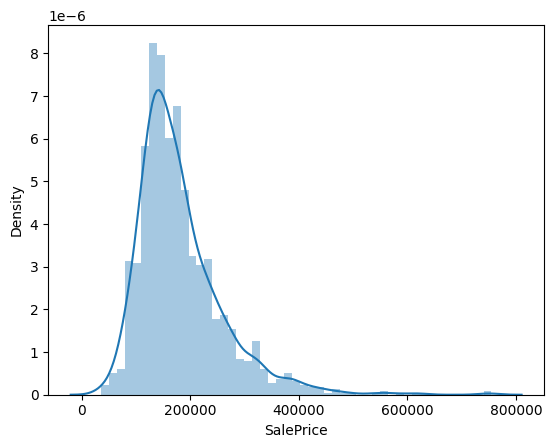

In [ ]:
sns.distplot(df['SalePrice']);

From the chart above, it can be seen that:  
    SalePrices deviates from the normal distribution
    It is appreciable positive skewness
    It Shows peakedness

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The values of Skewness and Kurtosis are in accceptable ranges

C:\Users\admin\AppData\Local\Temp\ipykernel_10296\812354755.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


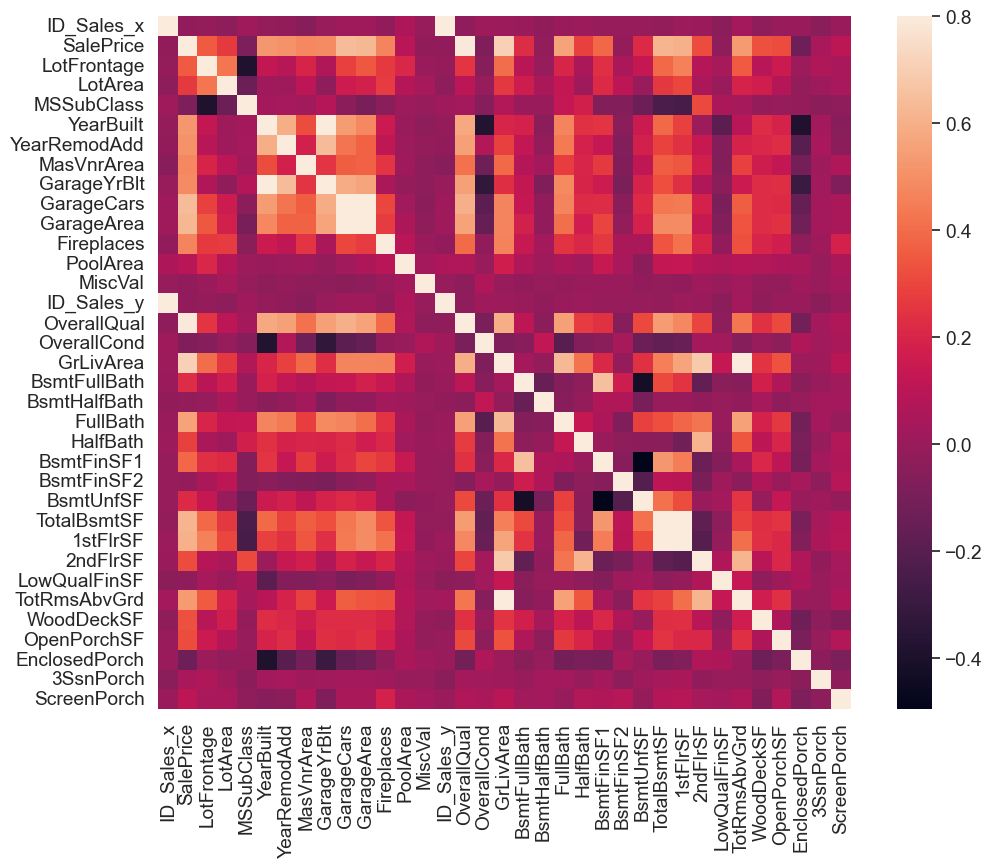

In [ ]:
#Correlation matrix (heatmap style)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

As the heatmap present,there are several factors have high correlation with SalePrice. However, some of them have dtype=int but they are still categorial variable 
(For example: OverallQual dtype is int but it still categorial variables
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor)

In [ ]:
###Keep only numerical values for regression 
df[['ID_Sales_x', 'SalePrice', 'SaleType', 'SaleCondition', 'ID_OSD',
       'ID_BUILD', 'ID_UTL', 'ID_RAT', 'ID_ROOM', 'MSZoning',
       'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'PavedDrive', 'Street', 'Alley', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'Utilities', 'Heating',
       'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal',
       'ID_Sales_y', 'OverallQual', 'OverallCond', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageCond',
       'GarageQual', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch']]

In [ ]:
df.columns.values

array(['ID_Sales_x', 'SalePrice', 'SaleType', 'SaleCondition', 'ID_OSD',
       'ID_BUILD', 'ID_UTL', 'ID_RAT', 'ID_ROOM', 'MSZoning',
       'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'PavedDrive', 'Street', 'Alley', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'Utilities', 'Heating',
       'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal',
       'ID_Sales_y', 'OverallQual', 'OverallCond', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageCond',
       'GarageQual', 'GrLivArea', 'BsmtFullBath', 

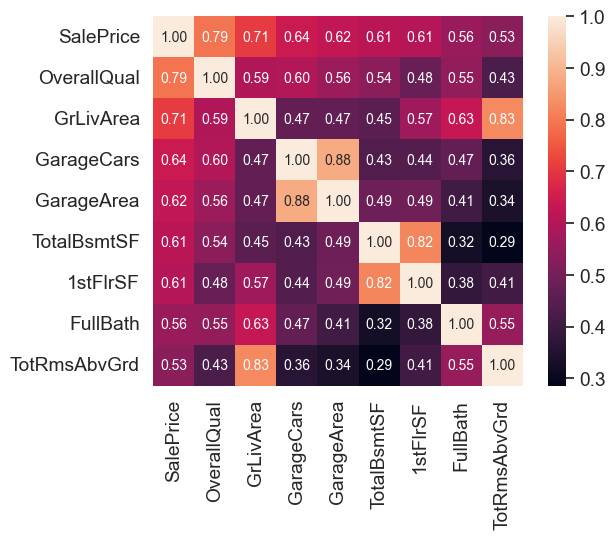

In [ ]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the heatmap, I select only top 9 factors which have highest correlation with SalePrices
According to the heatmap, I can detect several insights: 
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
- Garage Car and Garage Area are also strongly correlated variables with SalePrices, however, the relationship between them are considerably high(0.82 > 0.8), hence I only keep one factor - GarageCar because it has higher correlation with SalePrices
- Similarly, between GrLivArear and TotRmAbvGrd, I decided to eliminate ToRmsAbvGrd (which has lower correlation with SalePrices)
- TotalBsmtSF and 1stFlrSF are also have close relationship (0.82) then I decide to take into account only TotalBsmtSF

In [ ]:
###Select highly correlated factors
df_train= df[['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF']]

In [ ]:
model= LinearRegression()
model.fit(df_train, df['SalePrice'])

LinearRegression()

In [ ]:
model.coef_

array([23572.23563223,    45.64315247, 18582.20858995,    32.52033744])

In [ ]:
model.intercept_

-99248.85289101154

In [ ]:
SalePrices = 23468.50871893*OverallQual + 45.09481373*GrLivArea + 18455.36615427*GarageCars+ 
                32.62410932*TotalBsmtSF + 1143.22241049*FullBath - 99460.00890091187

In [ ]:
model.predict([[10000, 10000,3,2000,2]])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.35159476e+08])

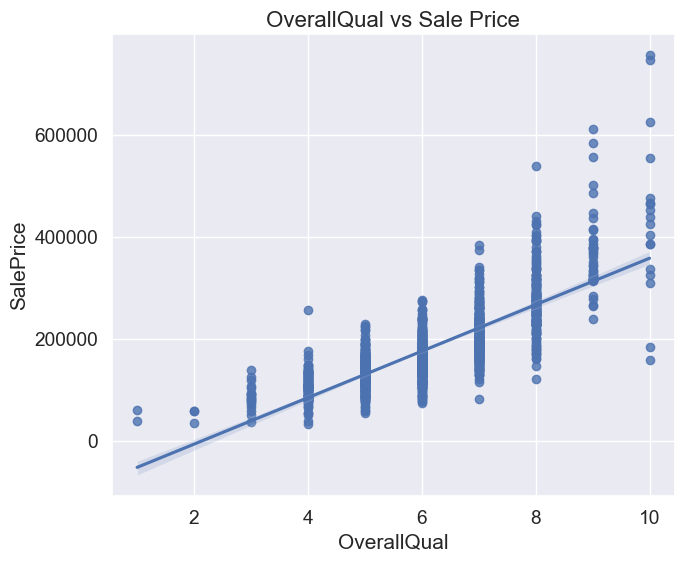

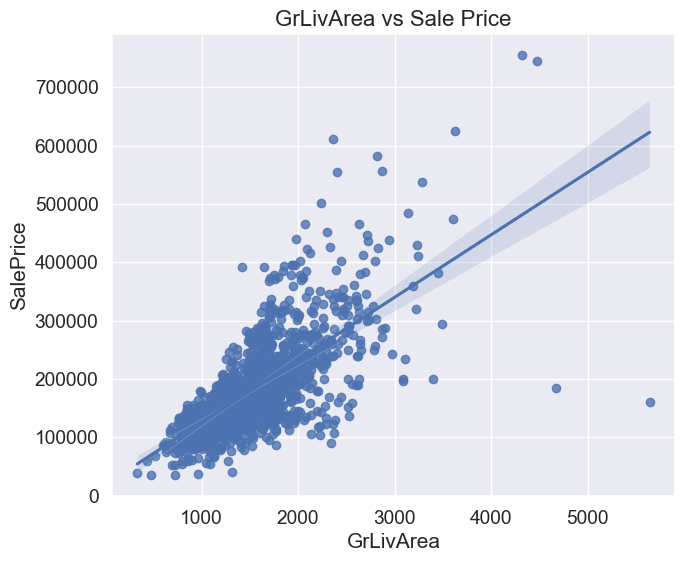

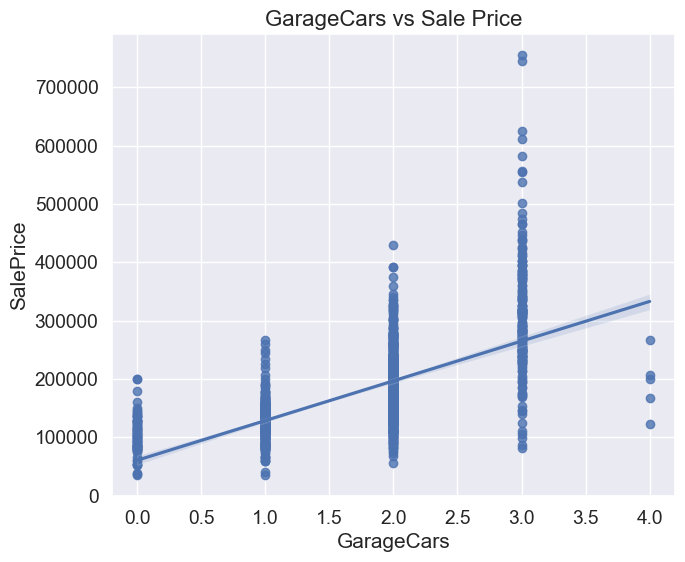

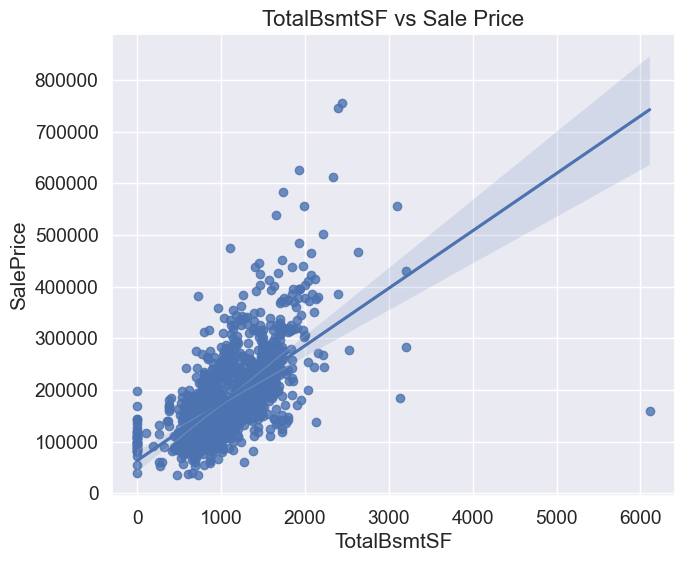

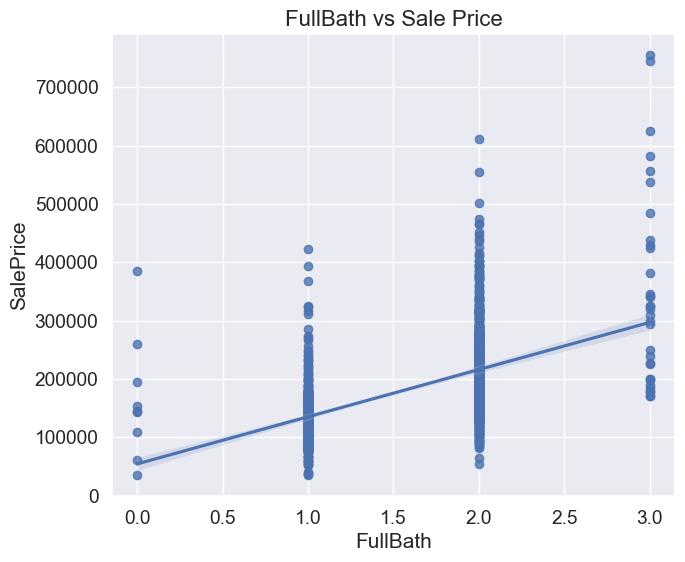

In [ ]:
Top_5 = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF',  'FullBath']
for factor in Top_5:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    ax = sns.regplot(x=factor, y="SalePrice", data=df)
    ax.set_title(f"{factor} vs Sale Price", fontsize=16)

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
estimator = LinearRegression().fit(df[TotalBsmtSF], df[saleprice])
estimator.coef

NameError: name 'TotalBsmtSF' is not defined